# Working with Data - Computer Lab for Guest Lecture Julia Lane

In this computer lab we will learn more more details and practice data work to enhance the content of the lecture presented by Julia Lane on responsible data use. We will address a research question, think about data and measurement errors, and manipulate data. 

OUTLINE: 
1. Define a research question 
2. Think about what data are available 
3. Think about possible measurement errors 
4. Think about the interpretation of your results 
5. Inform your results by linking datasets 

# 1. Define a reserach question
Which Community Districts in NYC show the highest number of complaints?

# 2. Think about what data are available
Find suitable data by searching the CUSP Data Catalog https://datahub.cusp.nyu.edu/catalog. You can use Urban Profiler to investigate the Metadata associated with each dataset. Using this tool will help you to decide which attributes of the data you need to answer your question so you don't have to load the entire dataset. 

In [1]:
import os
import pandas as pd
import numpy as np
import re
import statsmodels.formula.api as smf

import matplotlib.pyplot as plt
%matplotlib inline
PUIdata = os.getenv('PUIDATA')

In [2]:
data = pd.read_csv('/projects/open/NYCOpenData/nycopendata/data/erm2-nwe9/1446832678/erm2-nwe9', nrows = 10)
data.head()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,31911011,11/05/2015 02:59:15 AM,NaN,DOT,Department of Transportation,Street Condition,Pothole,NaN,11224.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.573431,-73.991742,"(40.57343122248129, -73.99174247588253)"
1,31908754,11/05/2015 02:09:49 AM,NaN,CHALL,CHALL,Opinion for the Mayor,HOUSING,NaN,NaN,NaN,...,NaN,NaN,NaN,1-1-1173130914,NaN,NaN,NaN,NaN,NaN,NaN
2,31910423,11/05/2015 02:06:51 AM,NaN,DPR,Department of Parks and Recreation,Root/Sewer/Sidewalk Condition,Trees and Sidewalks Program,Street,11234.0,1157 EAST 57 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.625004,-73.920726,"(40.62500363580505, -73.92072558378698)"
3,31909924,11/05/2015 02:02:20 AM,NaN,NYPD,New York City Police Department,Illegal Parking,Blocked Hydrant,Street/Sidewalk,11218.0,722 EAST 4 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.634522,-73.974790,"(40.634522428879706, -73.97479041437481)"
4,31913310,11/05/2015 01:57:20 AM,11/05/2015 01:57:31 AM,HRA,HRA Benefit Card Replacement,Benefit Card Replacement,Medicaid,NYC Street Address,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
# Load dataset

#data311 = pd.read_csv('https://data.cityofnewyork.us/resource/erm2-nwe9.csv')
data311 = pd.read_csv('/projects/open/NYCOpenData/nycopendata/data/erm2-nwe9/1446832678/erm2-nwe9',
                     usecols = ['Unique Key','Agency', 'Complaint Type',
                                'Community Board', 'Borough','Created Date', 'Closed Date'])

In [4]:
print data311.shape
data311.head()

(10187766, 7)


,Unique Key,Created Date,Closed Date,Agency,Complaint Type,Community Board,Borough
0,31911011,11/05/2015 02:59:15 AM,NaN,DOT,Street Condition,13 BROOKLYN,BROOKLYN
1,31908754,11/05/2015 02:09:49 AM,NaN,CHALL,Opinion for the Mayor,0 Unspecified,Unspecified
2,31910423,11/05/2015 02:06:51 AM,NaN,DPR,Root/Sewer/Sidewalk Condition,18 BROOKLYN,BROOKLYN
3,31909924,11/05/2015 02:02:20 AM,NaN,NYPD,Illegal Parking,12 BROOKLYN,BROOKLYN
4,31913310,11/05/2015 01:57:20 AM,11/05/2015 01:57:31 AM,HRA,Benefit Card Replacement,0 Unspecified,Unspecified


# 3. Think about possible measurement errors
Do you see any problems regarding possible measurement error? Think about who is represented in the data, ommissions, duplications, content error, missing data, etc. 

There may be some omission errors, given that the this data only represents the ones who call the 311 service. Also, some complaints could be duplicated, those complaints that are not resolved and the citizen keeps calling the 311 service.

In [5]:
# Check if all Boroughs and Community Districts are represented in the Data 
data311.Borough.value_counts()

BROOKLYN         2831932
QUEENS           2189760
MANHATTAN        1900005
BRONX            1665625
Unspecified      1109446
STATEN ISLAND     490998
Name: Borough, dtype: int64

Here we se Community boards that doesn't exists, like 80 Queens. Also there is missing information aboaut the Community Boards, that shows as Unspecified.

In [6]:
data311['Community Board'].value_counts().index

Index([u'0 Unspecified', u'12 MANHATTAN', u'Unspecified BROOKLYN',
       u'12 QUEENS', u'Unspecified MANHATTAN', u'Unspecified QUEENS',
       u'Unspecified BRONX', u'03 BROOKLYN', u'07 QUEENS', u'17 BROOKLYN',
       u'05 BROOKLYN', u'14 BROOKLYN', u'07 BRONX', u'01 BROOKLYN',
       u'01 STATEN ISLAND', u'04 BRONX', u'01 QUEENS', u'05 QUEENS',
       u'12 BRONX', u'13 QUEENS', u'05 BRONX', u'18 BROOKLYN', u'07 MANHATTAN',
       u'09 QUEENS', u'12 BROOKLYN', u'03 MANHATTAN', u'08 MANHATTAN',
       u'09 BRONX', u'15 BROOKLYN', u'05 MANHATTAN', u'08 BROOKLYN',
       u'11 BROOKLYN', u'04 BROOKLYN', u'10 MANHATTAN', u'03 STATEN ISLAND',
       u'09 BROOKLYN', u'02 MANHATTAN', u'04 MANHATTAN', u'10 QUEENS',
       u'09 MANHATTAN', u'08 QUEENS', u'11 BRONX', u'03 QUEENS',
       u'02 STATEN ISLAND', u'02 BROOKLYN', u'02 QUEENS', u'06 BROOKLYN',
       u'10 BROOKLYN', u'07 BROOKLYN', u'06 MANHATTAN', u'14 QUEENS',
       u'11 QUEENS', u'06 BRONX', u'04 QUEENS', u'10 BRONX', u'11 MANHATTA

In [7]:
commuBord = data311['Community Board'].value_counts().index
commuDF = pd.DataFrame([i.split(' ',2) for i in commuBord])
commuDF.iloc[:,1].value_counts()
# 59 community districts, 
# eighteen in Brooklyn
# fourteen in Queens
# twelve in the Bronx
# twelve in Manhattan
# and three in Staten Island.

BROOKLYN       21
QUEENS         20
BRONX          16
MANHATTAN      14
STATEN          5
Unspecified     1
Name: 1, dtype: int64

In [8]:
commuDF.columns = ['id','boro','extra']

In [9]:
commuDF.loc[commuDF.boro == 'MANHATTAN',].sort_values('id')
#81 QUEENS there is the problem

,id,boro,extra
59,01,MANHATTAN,None
36,02,MANHATTAN,None
25,03,MANHATTAN,None
37,04,MANHATTAN,None
29,05,MANHATTAN,None
49,06,MANHATTAN,None
22,07,MANHATTAN,None
26,08,MANHATTAN,None
39,09,MANHATTAN,None
33,10,MANHATTAN,None


In [10]:
# How many unique values do we have? 
#how do we consider dates for duplicates??
print 'There are %d unique Community Boards'% len(data311['Community Board'].value_counts().index)

There are 77 unique Community Boards


In [11]:
# Why do we have so many? Some of them are unspecified, missing. Some might be invalid entries. 
# We should have 59 Community Districts.

There are some invalid entries as stated before, with some Community Boards that have wrong numbers 

In [12]:
# Check for duplicates? Are these plausible?

In [13]:
sum(data311['Community Board'].value_counts().index.duplicated())


0

While it is possible to have duplicated values (due to typos for example), there are none in this data set

In [14]:
# What about missing values? Can you detect any patterns? 

In [15]:
sum(data311['Community Board'].value_counts())

10187766

There are no missing values, only those with Unspecified. The sum of all the responses in Commuty Board matches the total rows.

In [16]:
# Data Editing: Is it possible to replace missing values? Is it possible to use Complaint Type 
# to fill missings in Resolution Descriptor?

If the complaint type is strongly correlated with the Resolution Descriptor, then in a way be used as a resource to infer that missing information. 

In [17]:
# Generate marker for unplausible Community Districts
# How do these districts look like? 
# Generally, the boards are identify with a number that doesn't matches the existing ones. This is 80s for Queens,
# 50s for Brooklyn, etc. Regular expresions can be used to create de markers for each board

markerQueens = data311['Community Board'].str.contains('8[0-9] QUEENS')
#80,81,82,83,84
markerBrooklyn = data311['Community Board'].str.contains('5[0-9] BROOKLYN')
#56
markerBronx = data311['Community Board'].str.contains('2[0-9] BRONX')
#26,27
markerManhattan = data311['Community Board'] == '64 MANHATTAN'
markerStaten = data311['Community Board'] == '95 STATEN ISLAND'

markerUnsp = data311['Community Board'].str.contains('Unspecified')

markerGeneral = (~markerQueens) & (~markerBronx) & (~markerBrooklyn) & (~markerManhattan) & (~markerStaten) & (~markerUnsp)

In [18]:
# Drop the marked districts
cleanData = data311.loc[markerGeneral,]
cleanData.shape

(8110945, 7)

In [19]:
# Produce your result: Generate an indicator which ranks the Community District by complaint numbers 
# on the Community district level

#total count of complaint is used
cleanData[['Unique Key','Community Board']].groupby('Community Board').count().head()

,Unique Key
Community Board,
01 BRONX,74631
01 BROOKLYN,185057
01 MANHATTAN,77974
01 QUEENS,171484
01 STATEN ISLAND,182713


In [20]:
# Safe reduced data frame (Community District level)
compByCommDict = cleanData[['Unique Key','Community Board']].groupby('Community Board').count()
compByCommDict.columns = ['Complaints']
compByCommDict.sort_values(by = 'Complaints', ascending=False).head()

,Complaints
Community Board,
12 MANHATTAN,268053
12 QUEENS,229383
03 BROOKLYN,197306
07 QUEENS,195961
17 BROOKLYN,191720


# 4. Think about the interpretation of your results?
What do you have to keep in mind when interpreting your results? Are they generable? Does the way the data is collected influence your results? To better inform city agancies it might be good to explore in more detail the underlying dempgraphics/infrastructure of a Community District becasue this might influence 311 calls. You can do this by merging external data on the Community District level to your analysis data. 

In [21]:
# Population by Community District
#df_pop = pd.read_csv(PUIdata + "/Final_Demographics.csv")
df_pop = pd.read_csv('http://cosmo.nyu.edu/~fb55/PUI2016/data/Final_Demographics.csv')
print df_pop.shape
df_pop.head()

(59, 158)


,FIPS,cd_id,Total Population,Population Density (per sq. mile),% Total Population: Male,% Total Population: 18 to 24 Years,% Total Population: 25 to 34 Years,% Total Population: 35 to 44 Years,% Population 5 Years And Over: Speak Only English,% Population 5 Years And Over: Spanish or Spanish Creole,...,"Employed Civilian Population 16 Years And Over: Production, transportation, and material moving occupations: Production occupations","Employed Civilian Population 16 Years And Over: Production, transportation, and material moving occupations: Transportation and material moving occupations","% Employed Civilian Population 16 Years And Over: Management, professional, and related occupations",% Employed Civilian Population 16 Years And Over: Service occupations,% Employed Civilian Population 16 Years And Over: Sales and office occupations,"% Employed Civilian Population 16 Years And Over: Farming, fishing, and forestry occupations","% Employed Civilian Population 16 Years And Over: Construction, extraction, and maintenance occupations","% Employed Civilian Population 16 Years And Over: Production, transportation, and material moving occupations","% Employed Civilian Population 16 Years And Over: Production, transportation, and material moving occupations: Production occupations","% Employed Civilian Population 16 Years And Over: Production, transportation, and material moving occupations: Transportation and material moving occupations"
0,3603701,BX08,106737,31229.95006,46.65,10.73,15.04,11.32,46.80,39.24,...,665,1518,42.66,28.95,20.89,0.24,2.65,4.60,1.40,3.20
1,3603702,BX12,134644,19966.67839,46.35,11.35,14.29,12.57,73.09,18.19,...,1156,4174,29.57,33.98,20.40,0.00,7.08,8.97,1.95,7.02
2,3603703,BX10,121209,12913.81703,45.20,8.62,13.74,12.78,61.79,26.43,...,941,3433,36.20,22.85,25.09,0.00,7.68,8.18,1.76,6.42
3,3603704,BX11,135839,35677.95453,50.09,8.10,17.43,14.09,43.22,36.45,...,2189,5592,30.06,27.86,22.24,0.00,7.03,12.81,3.60,9.20
4,3603705,BX03,172247,39405.79222,44.72,14.24,14.89,12.38,36.82,54.24,...,1437,5436,16.80,41.00,22.29,0.03,8.45,11.43,2.39,9.04


In [22]:
# Check variables in file
list(df_pop.columns)

['FIPS',
 'cd_id',
 'Total Population',
 'Population Density (per sq. mile)',
 '% Total Population: Male',
 '% Total Population: 18 to 24 Years',
 '% Total Population: 25 to 34 Years',
 '% Total Population: 35 to 44 Years',
 '% Population 5 Years And Over: Speak Only English',
 '% Population 5 Years And Over: Spanish or Spanish Creole',
 '% Population 5 Years And Over: Spanish or Spanish Creole: Speak English "very Well"',
 '% Population 5 Years And Over: Spanish or Spanish Creole: Speak English Less Than "very Well"',
 'Population 25 Years and over:',
 'Population 25 Years and over: Less Than High School',
 'Population 25 Years and over: High School Graduate (includes equivalency)',
 'Population 25 Years and over: Some college',
 "Population 25 Years and over: Bachelor's degree",
 "Population 25 Years and over: Master's degree",
 'Population 25 Years and over: Professional school degree',
 'Population 25 Years and over: Doctorate degree',
 '% Population 25 Years and over: Less Than Hi

In [23]:
# How many community districts are in file? 
len(df_pop.cd_id.value_counts())

59

In [24]:
# Manipulate data to get some information on demographics by Community District. 
# Think about who might be more likely to call 311


In [25]:
def changeCD(string):
    '''
    This function takes a string of 4 characters for each community district
    and returns the community distric in a format compatible with 311 dataset
    And exception is made with Manhattan 11 district
    '''
    borosDic = {'BK':'BROOKLYN', 'BX':'BRONX','MN':'MANHATTAN','QN':'QUEENS','SI':'STATEN ISLAND'}
    boro = string[:2]
    suffix =  string[2:]
    if len(suffix) > 2:
        suffix = suffix[:2]
    newID = '%s %s' %(suffix,borosDic[boro]) 
    return newID

In [26]:
df_pop['Community Board'] = map(changeCD,df_pop.cd_id)


In [27]:
# Save data frame
cdPop = df_pop.loc[:,['Community Board','FIPS','% Population 25 Years and over: Some college or more']].copy()
cdPop.columns = ['commBoard','FIPS','educColMore']
cdPop.head()


,commBoard,FIPS,educColMore
0,08 BRONX,3603701,63.82
1,12 BRONX,3603702,48.97
2,10 BRONX,3603703,52.74
3,11 BRONX,3603704,49.08
4,03 BRONX,3603705,35.49


In [28]:
# Infrastructure by Community District
df_infr = pd.read_csv("http://cosmo.nyu.edu/~fb55/PUI2016/data/ACS_Computer_Use_and_Internet_2014_1Year_Estimate.csv")
print df_infr.shape
df_infr.head()

(59, 31)


,FIPS,Geographic Identifier,Qualifying Name,Households,Households: With An Internet Subscription,Households: Dial-Up Alone,Households: Dsl,Households: With Mobile Broadband,Households: Without Mobile Broadband,Households: Cable Modem,...,Households: Mobile Broadband Alone or With Dialup,Households: Internet Access Without A Subscription,Households: No Internet Access,% Households: With An Internet Subscription,Households.1,Households: Has A Computer,Households: With Dial-Up Internet Subscription Alone,Households: With A Broadband Internet Subscription,Households: Without An Internet Subscription,Households: No Computer
0,3603701,79500US3603701,"NYC-Bronx Community District 8--Riverdale, New...",42035,31795,444,2813,946,1867,19178,...,2168,2119,8121,75.64,42035,35048,404,30943,3701,6987
1,3603702,79500US3603702,"NYC-Bronx Community District 12--Wakefield, Ne...",44830,32243,178,849,405,444,18653,...,928,1891,10696,71.92,44830,36700,178,31435,5087,8130
2,3603703,79500US3603703,"NYC-Bronx Community District 10--Co-op City, N...",47050,32729,158,1863,398,1465,20044,...,639,2882,11439,69.56,47050,38700,158,32333,6209,8350
3,3603704,79500US3603704,NYC-Bronx Community District 11--Pelham Parkwa...,44922,32003,141,1478,474,1004,17917,...,1001,2722,10197,71.24,44922,37237,122,31278,5837,7685
4,3603705,79500US3603705,"NYC-Bronx Community District 3 & 6--Belmont, N...",57556,35503,88,1297,651,646,15847,...,1385,3312,18741,61.68,57556,42576,88,33408,9080,14980


In [29]:
# Check variables in file
list(df_infr.columns)

['FIPS',
 'Geographic Identifier',
 'Qualifying Name',
 'Households',
 'Households: With An Internet Subscription',
 'Households: Dial-Up Alone',
 'Households: Dsl',
 'Households: With Mobile Broadband',
 'Households: Without Mobile Broadband',
 'Households: Cable Modem',
 'Households: With Mobile Broadband.1',
 'Households: Without Mobile Broadband.1',
 'Households: Fiber-Optic',
 'Households: With Mobile Broadband.2',
 'Households: Without Mobile Broadband.2',
 'Households: Satellite Internet Service',
 'Households: With Mobile Broadband.3',
 'Households: Without Mobile Broadband.3',
 'Households: Two or More Fixed Broadband Types, or Other',
 'Households: With Mobile Broadband.4',
 'Households: Without Mobile Broadband.4',
 'Households: Mobile Broadband Alone or With Dialup',
 'Households: Internet Access Without A Subscription',
 'Households: No Internet Access',
 '% Households: With An Internet Subscription',
 'Households.1',
 'Households: Has A Computer',
 'Households: With Dial-

In [30]:
# How many community districts are in file? 
print 'Unique CD'
print len(df_infr['Qualifying Name'].unique())
print len(df_infr['FIPS'].unique())

print 'Duplicated CD'
print sum(df_infr['Qualifying Name'].duplicated())
print sum(df_infr['FIPS'].duplicated())

print df_infr['Qualifying Name'][df_infr['Qualifying Name'].duplicated()]
print df_infr['FIPS'][df_infr['FIPS'].duplicated()]

Unique CD
55
55
Duplicated CD
4
4
5     NYC-Bronx Community District 3 & 6--Belmont, N...
11    NYC-Bronx Community District 1 & 2--Hunts Poin...
19    NYC-Manhattan Community District 4 & 5--Chelse...
23    NYC-Manhattan Community District 1 & 2--Batter...
Name: Qualifying Name, dtype: object
5     3603705
11    3603710
19    3603807
23    3603810
Name: FIPS, dtype: int64


In [31]:
print df_infr.shape
df_infr.drop_duplicates(inplace=True)
print df_infr.shape

(59, 31)
(55, 31)


In [32]:
# Manipulate data to get some information on internet/broadband useage by Community District
# Aggregate the mobile subscription data
# Aggregate internet type by high and low connections

infrClean = df_infr.loc[:,['FIPS',
 'Households',
 'Households: Has A Computer',
 'Households: With Dial-Up Internet Subscription Alone',
 'Households: With A Broadband Internet Subscription',
 'Households: Without An Internet Subscription',
 'Households: No Computer']].copy()
infrClean.head()

,FIPS,Households,Households: Has A Computer,Households: With Dial-Up Internet Subscription Alone,Households: With A Broadband Internet Subscription,Households: Without An Internet Subscription,Households: No Computer
0,3603701,42035,35048,404,30943,3701,6987
1,3603702,44830,36700,178,31435,5087,8130
2,3603703,47050,38700,158,32333,6209,8350
3,3603704,44922,37237,122,31278,5837,7685
4,3603705,57556,42576,88,33408,9080,14980


In [33]:
# Aggregate internet type by high and low connections

In [34]:
# Save data frame 

# 5. Inform your results by linking datasets
Now you want to link the three data frames to produce summary statistics for Community Districts which show a high number of complaints vs. Community Districts which show a lower number of complaints. Please keep in mind that the identifiers used for the linkage (Community Dostrict IDs) should be recored the same way. Use regular expressions to harmonize the identifiers if possible. The identifiers should look like BK01, BK02, etc.
https://docs.python.org/2/library/re.html

In [35]:
# Harmonize identifier of dataframe 1

#complaints
compByCommDict['commBoard'] = compByCommDict.index
compByCommDict.head()

,Complaints,commBoard
Community Board,,
01 BRONX,74631,01 BRONX
01 BROOKLYN,185057,01 BROOKLYN
01 MANHATTAN,77974,01 MANHATTAN
01 QUEENS,171484,01 QUEENS
01 STATEN ISLAND,182713,01 STATEN ISLAND


In [36]:
#demographics
cdPop.head()

,commBoard,FIPS,educColMore
0,08 BRONX,3603701,63.82
1,12 BRONX,3603702,48.97
2,10 BRONX,3603703,52.74
3,11 BRONX,3603704,49.08
4,03 BRONX,3603705,35.49


In [37]:
#check if keys are ok
sum(compByCommDict.commBoard.isin(cdPop.commBoard))

59

In [38]:
#merge data
mergeData = pd.merge(left = compByCommDict, right=cdPop, how = 'left', on = 'commBoard')
print mergeData.shape
mergeData.head()

(59, 4)


,Complaints,commBoard,FIPS,educColMore
0,74631,01 BRONX,3603710,31.77
1,185057,01 BROOKLYN,3604001,66.25
2,77974,01 MANHATTAN,3603810,90.86
3,171484,01 QUEENS,3604101,64.99
4,182713,01 STATEN ISLAND,3603903,54.46


In [39]:
# Harmonize identifier of dataframe 2
#Merge data
#infraestructure
infrClean.head()


,FIPS,Households,Households: Has A Computer,Households: With Dial-Up Internet Subscription Alone,Households: With A Broadband Internet Subscription,Households: Without An Internet Subscription,Households: No Computer
0,3603701,42035,35048,404,30943,3701,6987
1,3603702,44830,36700,178,31435,5087,8130
2,3603703,47050,38700,158,32333,6209,8350
3,3603704,44922,37237,122,31278,5837,7685
4,3603705,57556,42576,88,33408,9080,14980


In [40]:
sum(mergeData.FIPS.isin(infrClean.FIPS))

59

In [41]:
mergeData = pd.merge(left = mergeData, right=infrClean, how = 'left', on = 'FIPS')
print mergeData.shape
mergeData.head()

(59, 10)


,Complaints,commBoard,FIPS,educColMore,Households,Households: Has A Computer,Households: With Dial-Up Internet Subscription Alone,Households: With A Broadband Internet Subscription,Households: Without An Internet Subscription,Households: No Computer
0,74631,01 BRONX,3603710,31.77,52191,39141,0,30958,8183,13050
1,185057,01 BROOKLYN,3604001,66.25,62990,52660,449,46148,6063,10330
2,77974,01 MANHATTAN,3603810,90.86,83976,79890,132,74339,5419,4086
3,171484,01 QUEENS,3604101,64.99,75758,66023,277,60733,5013,9735
4,182713,01 STATEN ISLAND,3603903,54.46,62047,50159,134,46362,3663,11888


In [42]:
mergeData.head()

,Complaints,commBoard,FIPS,educColMore,Households,Households: Has A Computer,Households: With Dial-Up Internet Subscription Alone,Households: With A Broadband Internet Subscription,Households: Without An Internet Subscription,Households: No Computer
0,74631,01 BRONX,3603710,31.77,52191,39141,0,30958,8183,13050
1,185057,01 BROOKLYN,3604001,66.25,62990,52660,449,46148,6063,10330
2,77974,01 MANHATTAN,3603810,90.86,83976,79890,132,74339,5419,4086
3,171484,01 QUEENS,3604101,64.99,75758,66023,277,60733,5013,9735
4,182713,01 STATEN ISLAND,3603903,54.46,62047,50159,134,46362,3663,11888


In [43]:
mergeData['broadbandP'] =  mergeData['Households: With A Broadband Internet Subscription'] / mergeData.Households * 100
mergeData['complaintsP'] = mergeData['Complaints'] / mergeData.Households * 100

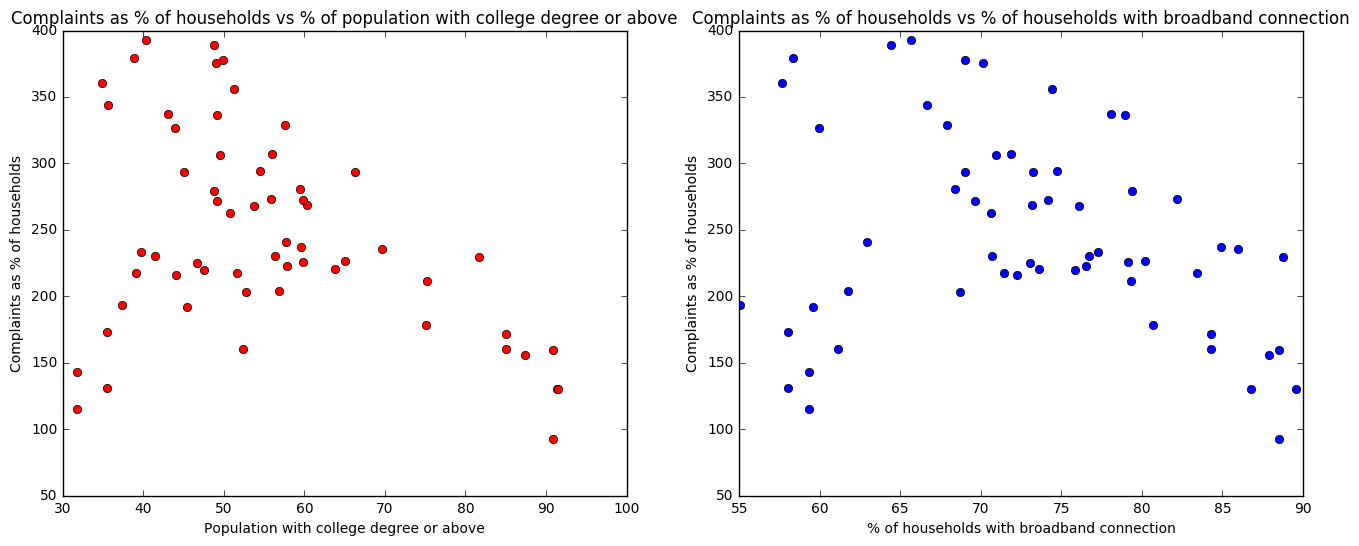

In [44]:
# Are the demographics and infrastructure different in Community Districts that show more complaints than others?
fig = plt.figure(figsize=(16,6))
ax1 = fig.add_subplot(1,2,1)
ax1.plot(mergeData.educColMore,mergeData.complaintsP,'ro')
ax1.set_title('Complaints as % of households vs % of population with college degree or above')
ax1.set_xlabel('Population with college degree or above')
ax1.set_ylabel('Complaints as % of households')


ax2 = fig.add_subplot(1,2,2)
ax2.plot(mergeData.broadbandP,mergeData.complaintsP,'bo')
ax2.set_title('Complaints as % of households vs % of households with broadband connection')
ax2.set_xlabel('% of households with broadband connection')
ax2.set_ylabel('Complaints as % of households')

## Figure 1
Plots show the scatter plot of Complaints as % of households vs % of population with college degree or above (in red) and vs % of households with broadband connection (in blue). There is a pattern showing a curve, wich suggest a polynomial fit would be the best.

In [45]:
mergeData['broadbandP2'] = mergeData['broadbandP'] ** 2
mergeData['educColMore2'] = mergeData['educColMore'] ** 2


In [46]:
lm1 = smf.ols(formula='complaintsP ~ broadbandP + broadbandP2', data=mergeData).fit()
print lm1.summary()

                            OLS Regression Results                            
Dep. Variable:            complaintsP   R-squared:                       0.305
Model:                            OLS   Adj. R-squared:                  0.280
Method:                 Least Squares   F-statistic:                     12.27
Date:                Mon, 07 Nov 2016   Prob (F-statistic):           3.81e-05
Time:                        13:57:55   Log-Likelihood:                -327.85
No. Observations:                  59   AIC:                             661.7
Df Residuals:                      56   BIC:                             667.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------
Intercept   -1674.0337    480.255     -3.486      

In [47]:
lm2 = smf.ols(formula='complaintsP ~ educColMore + educColMore2', data=mergeData).fit()
print lm2.summary()

                            OLS Regression Results                            
Dep. Variable:            complaintsP   R-squared:                       0.335
Model:                            OLS   Adj. R-squared:                  0.311
Method:                 Least Squares   F-statistic:                     14.09
Date:                Mon, 07 Nov 2016   Prob (F-statistic):           1.10e-05
Time:                        13:57:55   Log-Likelihood:                -326.54
No. Observations:                  59   AIC:                             659.1
Df Residuals:                      56   BIC:                             665.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------
Intercept      -24.7350    105.704     -0.234   

In [48]:
np.corrcoef(mergeData.broadbandP,mergeData.educColMore)[0, 1]


0.7856754292815975

According to the plots and the models summary, the ammount of complaints by community board (in relation to the amount of households) has its peak in the middle values of the variables taken into accounts. This variables are % of population with college degree or above and vs % of households with broadband connection for each community board. This variables  paint, in a way, the same picture of those community boards (they are highly correlated with each other). One possible conclusion could be that middle classes' neighborhoods are more prone to complain to the 311 than upper classes. 